# Portfolio Basics

## Course overview
* ch1 Porfolio weights and returns
* ch2 Portfolio performance evaluation
* ch3 Drivers of Performance
* ch4 Portofolio Optimization

## To avoid large losses
* carefully select deversified portfolios
* backtest portfolio strategy
* constant monitoring of portfolio performance

In [15]:
require(quantmod)

[1] "PEP" "KO"

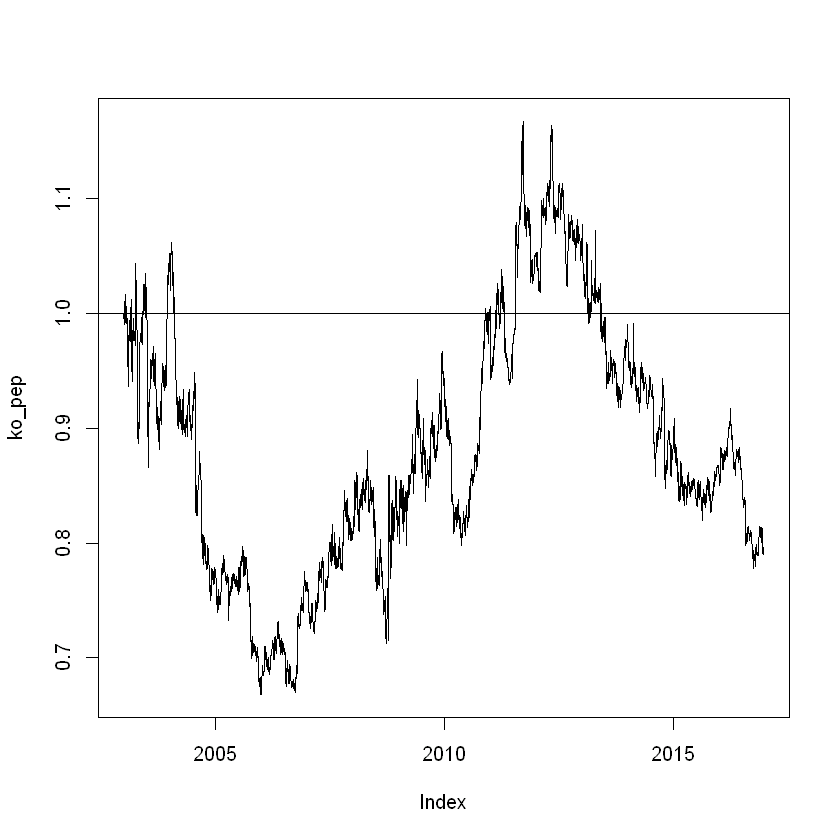

In [16]:
##first example show how two companies (pepsico and coca-kola) selling similar products
# can have a evolving relative value
ticker<-new.env()
getSymbols(c('PEP','KO'), env=ticker, src="yahoo", from=as.Date("2003-01-02") )
ko<-Ad(ticker$KO)  # adjusted value
ko<-ko/as.numeric(ko[1]) #normalize by first element
pep<-Ad(ticker$PEP)
pep<-pep/as.numeric(pep[1])
ko_pep <-ko/pep #ratio of two tickers
plot.zoo(ko_pep)
abline(h=1)

## Portfolio weights
For N investments $V_1,..V_N$ the i_th weight $w_i = \frac{V_i}{\sum_i^N V_i}$

### analyzing values of portfolio weights reveal the investment bets

In [17]:
#simple R to compute weights given amounts for each asset class 
# Define the vector values
values <- c(4000,4000,2000)
names(values) <- c("Equities", "Bonds", "Commodities")
# Define the vector weights
weights <- values/sum(values)

# Print the resulting weights Sum of weights always yields to 1
print(weights)


   Equities       Bonds Commodities 
        0.4         0.4         0.2 


![title](alloc_strat.png)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001442 0.003389 0.018030 0.100000 0.115400 0.576900 

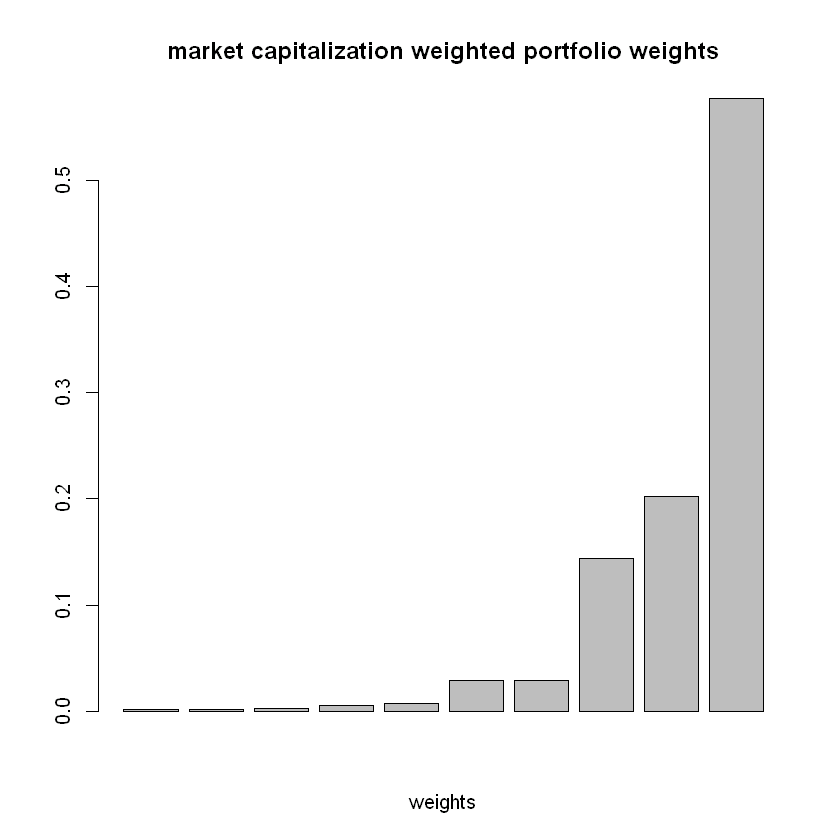

In [18]:
#a simple example of market capitalization weighted portfolio
#using 10 market capitalisations in millions USD
# Define marketcaps
marketcaps<-c(5, 8, 9, 20, 25, 100, 100, 500, 700, 2000) 
  
# Compute the weights
weights <- marketcaps/sum(marketcaps)
  
# Inspect summary statistics
summary(weights)
  
# Create a barplot of weights
  barplot(weights,main="market capitalization weighted portfolio weights" , xlab="weights")
# the bigget weigth comes for a biggest marketcap

# Porfolio Returns
### return is a relative change  in value
$$ R = \frac{EMV-BMV}{BMV} $$
### 3 steps
* initial portfolio value = sum of N investments at initial date
* final portfolio value = sum of N investment values at final date
* $$  R=\frac{finalValue - initialValue}{initialValue} $$


![title](ex_2assets_ret_1.png)

# Portfolio return also
$$PortfolioReturn = w_1 R_1 + w_2 R_2+..+w_n R_n$$
where  
$$w_i=\frac{Asset_i}{\sum_i^N Asset_i}$$
and 
$$ R_i =\frac{EMV(Asset_i)-BMV(Asset_i)}{BMV(Asset_i)}$$

In [19]:
## so the previous example using the sum of weighted returns formula
bmv<-c(200,300)
emv<-c(180,330)
wgh<-bmv/sum(bmv)
ret<-(emv-bmv)/bmv
print(wgh) #weights
print(ret) #2 asset individual returns
r_prtf <- sum(wgh*ret) #portfolio return
print(r_prtf)

[1] 0.4 0.6
[1] -0.1  0.1
[1] 0.02


In [20]:
#first chain-link example
#first period you make 10%  but second period you loose 5% 
#Q what is the final value of $1000 invested ?

1000*(1+0.1)*(1-0.05)

[1] 1045

### Q. after a loss of 50% in 1 period what should be a return in the next period to pare a loss?

In [21]:
#(1-0.5)*(1+x) = 1
#1+x-0.5-0.5x=1
#0.5x=0.5
#x=1
## i.e. you need a 100% return to erase a previous 50% loss 

## The practioner's challenge
* in practice, time series of portfolio returns
* longer history means more info on portfolio available

### use PerformanceAnalytics Package

### Dynamics of Porfolio Weights  2 approaches
* Set initial weights  and do not intervene
* actively change portfolio weights. (**Rebalancing**)



In [22]:
#first usage of PortfolioAnalytics Return.Calculate
require(PerformanceAnalytics)
#ticker env is present
getSymbols(c('AAPL','MSFT'), env=ticker, src="yahoo", from=as.Date("2006-01-01"),to=as.Date("2016-08-31"))
prices<-cbind(Ad(ticker$AAPL), Ad(ticker$MSFT))
returns<-Return.calculate(prices)
returns<-returns[-1,] #remove first NA line
#print head of returns
head(returns,2)

[1] "AAPL" "MSFT"

           AAPL.Adjusted MSFT.Adjusted
2006-01-04   0.002943074  0.0048435111
2006-01-05  -0.007869759  0.0007415454

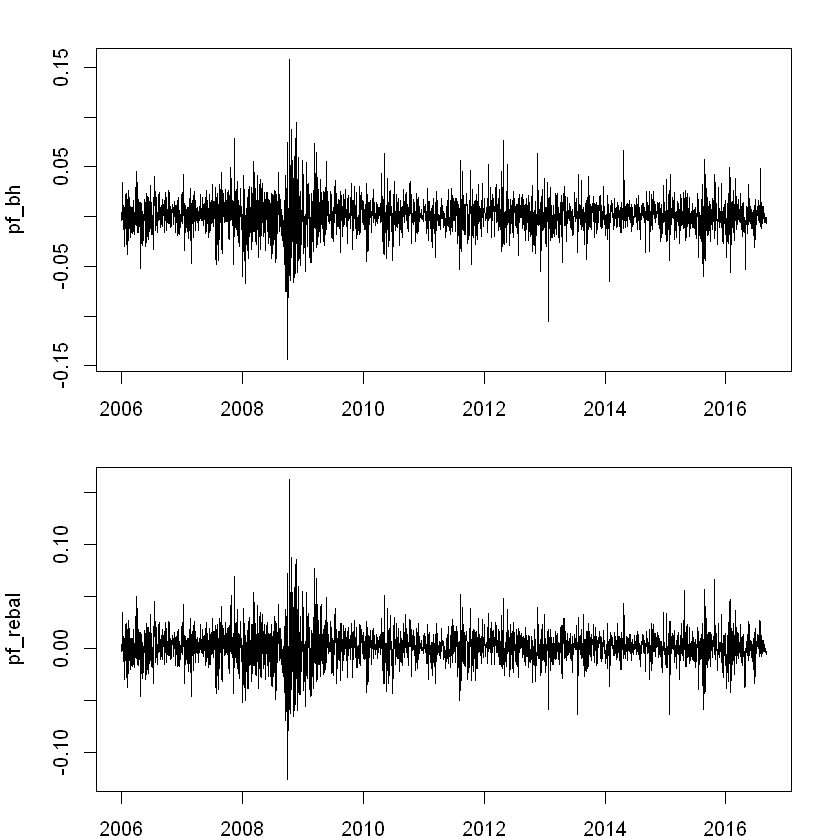

In [23]:
##first usage of Return.portfolio
#create equal weights for 2-asset portfolio
eq_weights <- c(0.5, 0.5)
# Create a portfolio using buy and hold (weights fixed, no rebalancing)
pf_bh <- Return.portfolio(R =returns, weights =eq_weights)
# Create a portfolio rebalancing monthly 
pf_rebal <- Return.portfolio(R=returns, weights=eq_weights,rebalance_on="months")
# Plot the time-series of daily returns
par(mfrow = c(2, 1), mar = c(2, 4, 2, 2))
plot.zoo(pf_bh)
plot.zoo(pf_rebal)

           AAPL.Adjusted
2016-08-30     0.7968525
2016-08-31     0.7982086

           AAPL.Adjusted
2016-08-30     0.4987742
2016-08-31     0.5008739

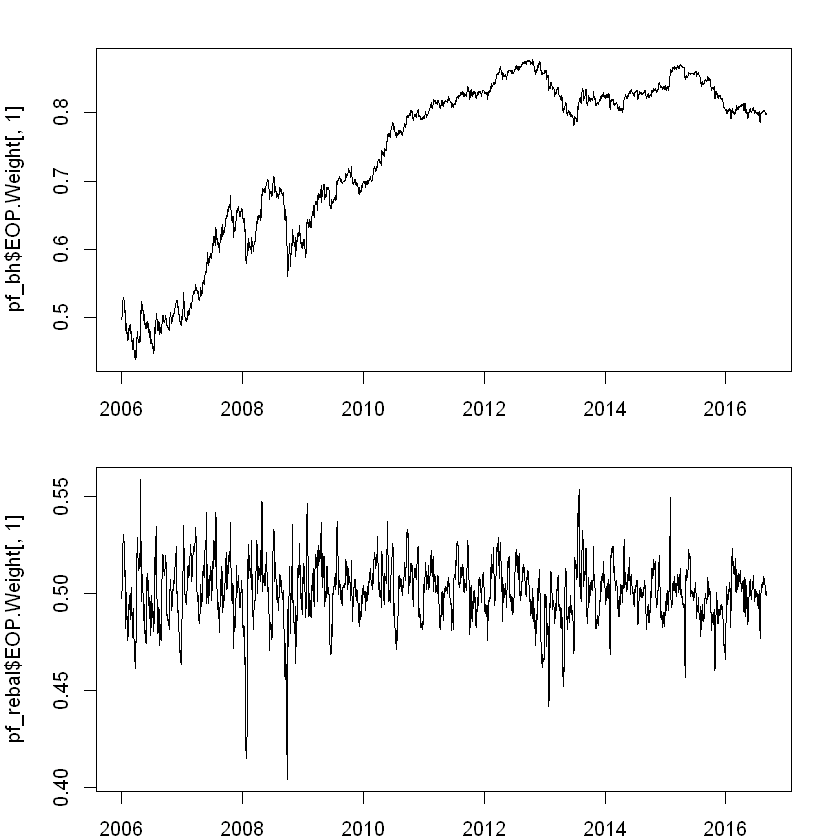

In [24]:
#getting portfolio returns as well as bop, eop weights
pf_bh <- Return.portfolio(R =returns, weights =eq_weights, verbose=TRUE)
pf_rebal <- Return.portfolio(R=returns, weights=eq_weights,rebalance_on="months",verbose=TRUE)
## see apple eop period weighgs for buy&hold and rebalanced portfolio
tail(pf_bh$EOP.Weight$AAPL.Adjusted,2)
tail(pf_rebal$EOP.Weight$AAPL.Adjusted,2)
##plot these end of period weights
par(mfrow = c(2, 1), mar=c(2, 4, 2, 2))
plot.zoo(pf_bh$EOP.Weight[,1])
#as we can see rebalanced weight oscilates around 0.5 and b&h  grows higher because AAPL relatively outperforms MSFT
plot.zoo(pf_rebal$EOP.Weight[,1])

## Dimensions of portfolio performance
### risk 
### reward

#### Portfolio mean return
#### Portfolio volatility
**assume a sample of T portfolio return observation**
$$ R_1,R_2,\dots,R_T$$

* **Arithmetic** mean return
$$ \hat{\mu} = \frac{R_1+R_2+..+R_T}{T}$$

Returns can deviate from average return **De-meaned return** $R_i-\hat{\mu}$

* Variance of the portfolio
$$ \hat{\sigma}^2= \frac{\sum_{j=1}^T (R_j-\hat{\mu})^2}{T-1}$$
* **volatility** of portfolio is a square root of its variance


### Arithmetic return mean vs geometric return mean
* Arithmetic mean return does not reflect  non zero contribution of +r followed by -r
* **Geometric** mean
$$ \hat{R} = \left[(1+R_1)*..*(1+R_T)\right]^{\frac{1}{T}} - 1 $$
e.g 
$$ [(1+0.5)*(1-0.5)]^{\frac{1}{2}} -1 \neq 0 = -0.134 $$


In [27]:
## example with sp500 returns